In [195]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import norm, skew
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore') # warnings 무시
%matplotlib inline

# sns Theme 
sns.set_style('darkgrid') 

# 소수점 표현 제한
pd.set_option('display.float_format', lambda x : '{:.2f}'.format(x))

# 디렉토리 내, 사용가능 파일 체크 
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

house-prices-advanced-regression-techniques



Read Data


In [196]:
df_train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
df_test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

In [197]:
print(df_train.columns)
df_test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [198]:
print(df_train.shape)
df_train.head(7)

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.00,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.00,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000


In [199]:
print(df_test.shape)
df_test.head(7)

(1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.00,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.00,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.00,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.00,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.00,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.00,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,nan,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal


In [200]:
# save Id Column before delete
train_id = df_train['Id']
test_id = df_test['Id']

# delete Id Column
df_train.drop('Id', axis=1, inplace=True)
df_test.drop('Id', axis=1, inplace=True)

In [201]:
((df_train.isnull().sum()) / len(df_train)).sort_values(ascending=True)[:60]

MSSubClass      0.00
TotalBsmtSF     0.00
Heating         0.00
SaleCondition   0.00
CentralAir      0.00
1stFlrSF        0.00
2ndFlrSF        0.00
LowQualFinSF    0.00
GrLivArea       0.00
BsmtFullBath    0.00
BsmtHalfBath    0.00
FullBath        0.00
HalfBath        0.00
BedroomAbvGr    0.00
KitchenAbvGr    0.00
KitchenQual     0.00
TotRmsAbvGrd    0.00
Functional      0.00
SaleType        0.00
YrSold          0.00
MoSold          0.00
MiscVal         0.00
PoolArea        0.00
ScreenPorch     0.00
BsmtUnfSF       0.00
3SsnPorch       0.00
OpenPorchSF     0.00
WoodDeckSF      0.00
PavedDrive      0.00
GarageArea      0.00
GarageCars      0.00
Fireplaces      0.00
EnclosedPorch   0.00
BsmtFinSF2      0.00
HeatingQC       0.00
BsmtFinSF1      0.00
MSZoning        0.00
LotArea         0.00
Street          0.00
LotShape        0.00
LandContour     0.00
Utilities       0.00
LotConfig       0.00
LandSlope       0.00
Neighborhood    0.00
Condition1      0.00
Condition2      0.00
BldgType     

In [202]:
((df_test.isnull().sum()) / len(df_test)).sort_values(ascending=True)[60:80]

MSZoning       0.00
MasVnrArea     0.01
MasVnrType     0.01
BsmtFinType2   0.03
BsmtFinType1   0.03
BsmtQual       0.03
BsmtExposure   0.03
BsmtCond       0.03
GarageType     0.05
GarageQual     0.05
GarageYrBlt    0.05
GarageFinish   0.05
GarageCond     0.05
LotFrontage    0.16
FireplaceQu    0.50
Fence          0.80
Alley          0.93
MiscFeature    0.97
PoolQC         1.00
dtype: float64

Data Processing

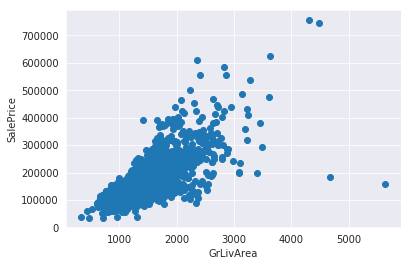

In [203]:
f, ax = plt.subplots()
ax.scatter(x=df_train['GrLivArea'], y=df_train['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

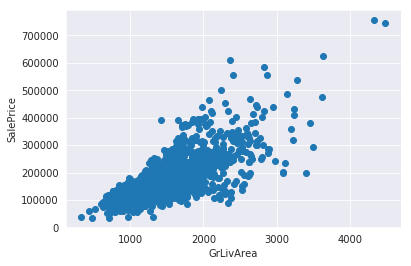

In [204]:
# Delete outlier
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice'] < 300000)].index)

# Delete outlier
#df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice'] > 700000)].index)

f, ax = plt.subplots()
ax.scatter(x=df_train['GrLivArea'], y=df_train['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

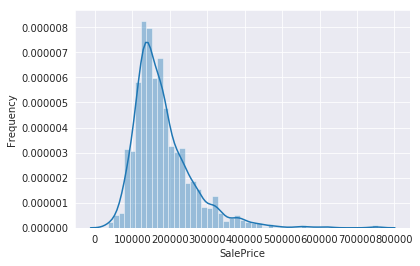

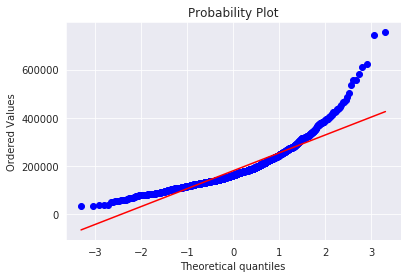

In [205]:
sns.distplot(df_train['SalePrice'])
plt.ylabel('Frequency')

fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

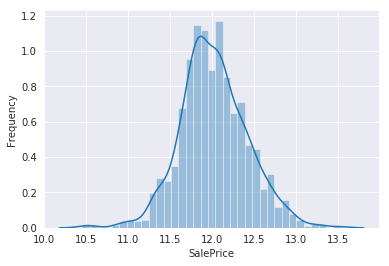

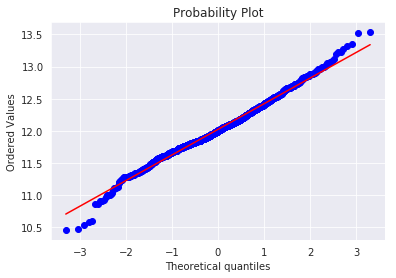

In [206]:
# for balance of 'SalePrice data'
df_train['SalePrice'] = np.log1p(df_train['SalePrice'])

sns.distplot(df_train['SalePrice'])
plt.ylabel('Frequency')


fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

Feature Engineering

In [207]:
dtrain = df_train.shape[0]
dtest = df_test.shape[0]
y_train = df_train['SalePrice'].values

combine = pd.concat((df_train, df_test)).reset_index(drop=True)
combine.drop(['SalePrice'], axis=1, inplace=True)
combine.shape

(2917, 79)

In [208]:
combine_nan = (combine.isnull().sum() / len(combine)) * 100
combine_nan = combine_nan.drop(combine_nan[combine_nan == 0].index).sort_values(ascending=False)[:30]
NAN_data = pd.DataFrame({"NAN data Ratio" : combine_nan})
NAN_data.head(30)
# There are 30 Features include NAN Data 

,NAN data Ratio
PoolQC,99.69
MiscFeature,96.40
Alley,93.21
Fence,80.43
FireplaceQu,48.68
LotFrontage,16.66
GarageQual,5.45
GarageCond,5.45
GarageFinish,5.45
GarageYrBlt,5.45


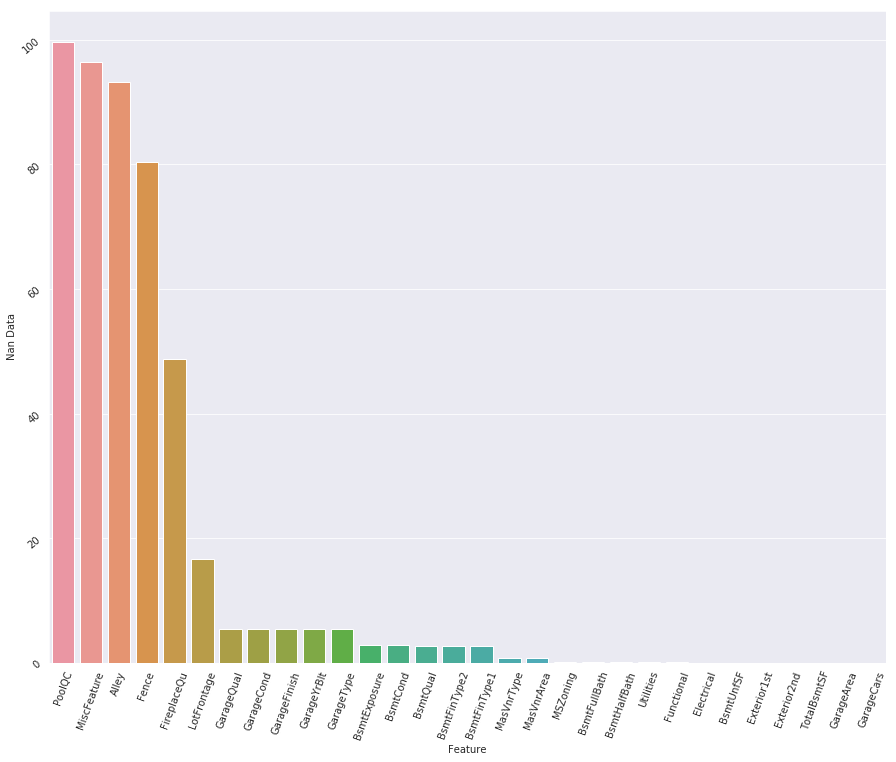

In [209]:
# Display NAN Data

f, ax = plt.subplots(figsize=(15,12))
plt.xticks(rotation='70')
plt.yticks(rotation='40')
sns.barplot(x=combine_nan.index, y=combine_nan)
plt.xlabel('Feature')
plt.ylabel('Nan Data')
plt.show()

Visualization between 'SalePrice' and other Features

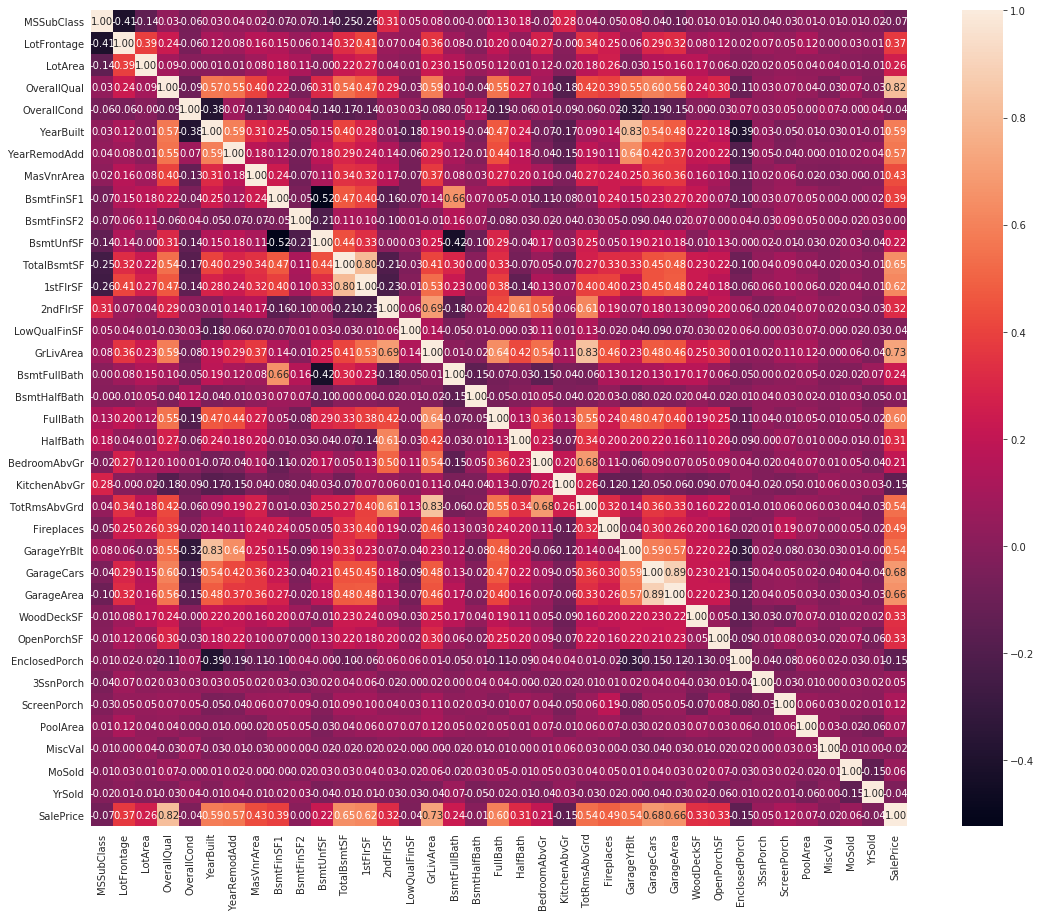

In [210]:
correlation = df_train.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(correlation, vmax=1.0, annot=True, annot_kws={'size': 10}, square=True, fmt='.2f')

# Check the Correlation Between 'SalePrice' and 'Other Features' by Heatmap

In [211]:
NAN_data.head(30)

,NAN data Ratio
PoolQC,99.69
MiscFeature,96.40
Alley,93.21
Fence,80.43
FireplaceQu,48.68
LotFrontage,16.66
GarageQual,5.45
GarageCond,5.45
GarageFinish,5.45
GarageYrBlt,5.45


In [212]:
# Input missing Data

for col in ('PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageQual', 'GarageCond', 'GarageFinish', 'GarageYrBlt', 'GarageType', 'BsmtExposure', 'BsmtCond', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1', 'MasVnrType'):
    combine[col] = combine[col].fillna('None')
for col in ('MasVnrArea', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF','TotalBsmtSF', 'GarageCars', 'GarageArea', 'BsmtFinSF2', 'BsmtFinSF1'):
    combine[col] = combine[col].fillna(0)
combine["LotFrontage"] = combine.groupby('Neighborhood')['LotFrontage'].transform(lambda x : x.fillna(x.median()))
combine['MSZoning'] = combine['MSZoning'].fillna(combine['MSZoning'].mode()[0])
combine = combine.drop(['Utilities'], axis=1)
combine["Functional"] = combine["Functional"].fillna("Typ") # reference by description
combine['Electrical'] = combine['Electrical'].fillna(combine['Electrical'].mode()[0])
combine['Exterior1st'] = combine['Exterior1st'].fillna(combine['Exterior1st'].mode()[0])
combine['Exterior2nd'] = combine['Exterior2nd'].fillna(combine['Exterior2nd'].mode()[0])
combine['KitchenQual'] = combine['KitchenQual'].fillna(combine['KitchenQual'].mode()[0])
combine['SaleType'] = combine['SaleType'].fillna(combine['SaleType'].mode()[0])
combine['MSSubClass'] = combine['MSSubClass'].fillna("None")

In [213]:
combine_nan = (combine.isnull().sum() / len(combine)) * 100
combine_nan = combine_nan.drop(combine_nan[combine_nan == 0].index).sort_values(ascending=False)[:30]
NAN_data = pd.DataFrame({"NAN data Ratio" : combine_nan})
NAN_data.head(30)

,NAN data Ratio


In [214]:
combine.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,None,3,1Fam,TA,No,706.00,0.00,...,Normal,WD,0,Pave,8,856.00,0,2003,2003,2008
1,1262,0,0,None,3,1Fam,TA,Gd,978.00,0.00,...,Normal,WD,0,Pave,6,1262.00,298,1976,1976,2007
2,920,866,0,None,3,1Fam,TA,Mn,486.00,0.00,...,Normal,WD,0,Pave,6,920.00,0,2001,2002,2008
3,961,756,0,None,3,1Fam,Gd,No,216.00,0.00,...,Abnorml,WD,0,Pave,7,756.00,0,1915,1970,2006
4,1145,1053,0,None,4,1Fam,TA,Av,655.00,0.00,...,Normal,WD,0,Pave,9,1145.00,192,2000,2000,2008


In [215]:
combine['TotalSF'] = combine['TotalBsmtSF'] + combine['1stFlrSF'] + combine['2ndFlrSF']

In [217]:
numeric_feats = combine.dtypes[combine.dtypes != "object"].index

# 수치형 데이터에서 skewness 체크
skewed_feats = combine[numeric_feats].apply(lambda x : skew(x.dropna())).sort_values(ascending=False)

print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)



Skew in numerical features: 



,Skew
MiscVal,21.94
PoolArea,17.69
LotArea,13.11
LowQualFinSF,12.08
3SsnPorch,11.37
KitchenAbvGr,4.30
BsmtFinSF2,4.14
EnclosedPorch,4.00
ScreenPorch,3.95
BsmtHalfBath,3.93


In [218]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    combine[feat] = boxcox1p(combine[feat], lam)

There are 36 skewed numerical features to Box Cox transform


In [219]:
combine.MSSubClass = combine.MSSubClass.apply(str)
combine.OverallCond = combine.OverallCond.apply(str)
combine.YrSold = combine.YrSold.astype(str)
combine.MoSold = combine.MoSold.astype(str)

In [220]:
cols = ('PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageQual', 'GarageCond', 'GarageFinish', 'GarageYrBlt', 
        'GarageType', 'BsmtExposure', 'BsmtCond', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1', 'MasVnrType','YrSold', 'MoSold')
        
for c in cols:
        label = LabelEncoder()
        label.fit(list(combine[c].values))
        combine[c] = label.transform(list(combine[c].values))

In [221]:
combine = pd.get_dummies(combine)

df_train = combine[:dtrain]
df_test = combine[dtrain:]

Modeling

In [222]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [ ]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(df_train.values)
    rmse = np.sqrt(-cross_val_score(model, df_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return (rmse)

In [ ]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha=0.0005, random_state=1))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [ ]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [ ]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=4,
                                   max_features='sqrt', min_samples_leaf=15, min_samples_split=10,
                                   loss='huber', random_state=5)

In [ ]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [ ]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [ ]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [ ]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [ ]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [ ]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [ ]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

In [ ]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

In [ ]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print("Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))